In [10]:
from glob import glob
from omegaconf import OmegaConf

In [11]:
def check_not_validated_ckpt(ckpt_pattern, ea_cfg_pattern):
    # nbmb
    ckpt_files = glob(ckpt_pattern)
    ea_files = glob(ea_cfg_pattern)

    print(f"total: {len(ckpt_files)} done: {len(ea_files)}")
    validated_ckpt_files = []
    for cfg_file in ea_files:
        cfg = OmegaConf.load(cfg_file)
        pw = cfg.pretrained_weight
        if pw not in ckpt_files:
            print(f"{pw} not found")
        else:
            validated_ckpt_files.append(pw)

    print('todo:')
    for pw in ckpt_files:
        if pw not in validated_ckpt_files:
            print(f"{pw}")

In [3]:
# nb201
ckpt_pattern = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/*201*batch*/*/checkpoints/last*'
ea_cfg_pattern = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea*201*batch*/*/.hydra/conf*'
check_not_validated_ckpt(ckpt_pattern, ea_cfg_pattern)

total: 29 done: 29
todo:


In [4]:
# nbmb
ckpt_pattern = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/*mb*batch*/*/checkpoints/last*'
ea_cfg_pattern = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea*mb*batch*/*/.hydra/conf*'
check_not_validated_ckpt(ckpt_pattern, ea_cfg_pattern)

total: 24 done: 22
todo:
/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch_NoneGrad/2022-05-04_06-55-10/checkpoints/last.ckpt
/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_6net_1batch_NoneGrad/2022-05-04_10-05-14/checkpoints/last.ckpt


In [5]:
# nbmb
ckpt_pattern = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/*mb*batch*/*/checkpoints/last*'
ea_cfg_pattern = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/eval*mb*batch*/*/.hydra/conf*'
check_not_validated_ckpt(ckpt_pattern, ea_cfg_pattern)

total: 24 done: 24
todo:


# Intrinsic dimension

In [2]:
# nbmb
ckpt_pattern = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/*mb*batch*/*/checkpoints/last*'
ckpts = glob(ckpt_pattern)
ckpts

['/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch_NoneGrad/2022-05-04_06-55-10/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch_NoneGrad/2022-05-04_07-21-40/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_6net_1batch_NoneGrad/2022-05-04_07-11-04/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_6net_1batch_NoneGrad/2022-05-04_10-05-14/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_3net_1batch_NoneGrad/2022-05-04_07-11-04/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_3net_1batch_NoneGrad/2022-05-04_07-21-41/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/sea

In [95]:
# nb201
ckpt_pattern = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/*201*batch*/*/checkpoints/last*'
ckpts = glob(ckpt_pattern)
ckpts

['/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_1net_1batch_watch/2022-05-04_00-35-49/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_5net_1batch_watch/2022-05-04_00-37-26/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_16net_1batch_watch/2022-05-04_00-37-38/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_1net_1batch/2022-04-27_09-20-46/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_1net_1batch/2022-04-27_09-41-26/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_1net_10batch/2022-04-27_09-25-52/checkpoints/last.ckpt',
 '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_

In [1]:
import torch
import numpy as np
from hyperbox_app.distributed.networks.nasbenchmb import NASBenchMBNet
from hyperbox_app.distributed.networks.nasbench201.nasbench201 import NASBench201Network
from hyperbox.mutator import RandomMutator
from omegaconf import OmegaConf
from hydra.utils import instantiate
from scipy.stats import kendalltau
from hyperbox_app.distributed.utils.twonn import twonn1, twonn2
from skdim.id import ESS
import skdim
from ipdb import set_trace

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity, paired_distances


def plot_ids_by_layers(model_ids, figsize=(8,8), topk=None, disable_label=None, only_mean=False):
    '''
    Args:
        model_ids: dict. {
            0: {'acc': 0.9288, 'IDs': [13,14,18,35,45,32,16,12,5]},
            1: {'acc': 0.9365, 'IDs': [...]},
            ...
        }
    '''
    import random
    import itertools
    from matplotlib import pyplot as plt
    marker = itertools.cycle(('+', '<',  'd', 'h', 'H','1', '.', '2', 'D', 'o', '*', 'v', '>')) 
    fig = plt.figure(num=1,figsize=figsize)
    ax = fig.add_subplot(111)
    for key, value in model_ids.items():
        if topk is not None and key > topk:
            break
        label, IDs = value['label'], value['IDs']
        label = f"{key}_{label}"
        y_axis = IDs
        color = (random.random(), random.random(), random.random())
        # print(x_axis, y_axis)
        if disable_label:
            label = None
        if len(np.array(y_axis).shape) == 1:
            x_axis = np.array(list(range(len(IDs))))/(len(IDs)-1)
            ax.plot(x_axis, y_axis, marker=next(marker), label=label, color=color)
        else:
            num = np.array(y_axis).shape[1]
            x_axis = np.array(list(range(num)))/(num-1)
            y_axis_lb = y_axis.min(0)
            y_axis_ub = y_axis.max(0)
            y_axis_mean = y_axis.mean(0)
            marker_ = next(marker)
            if not only_mean:
                ax.plot(x_axis, y_axis_lb, marker=marker_, color=color)
                ax.plot(x_axis, y_axis_ub, color=color, marker=marker_)
                ax.fill_between(x_axis, y_axis_lb, y_axis_ub, color='gray', alpha=0.2)
                ax.plot(x_axis, y_axis_mean, color='red', marker=marker_, label=label)
            else:
                ax.plot(x_axis, y_axis_mean, color=color, marker=marker_, label=label)
    ax.legend()
    plt.savefig('model_ids.pdf')
    plt.show()



In [147]:

cfg = OmegaConf.load('/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_1net_5batch/2022-05-07_04-28-49/.hydra/config.yaml')
cfg.datamodule.batch_size = 16
datamodule = instantiate(cfg.datamodule)
datamodule.setup()
test_loader = datamodule.test_dataloader()
imgs, labels = next(iter(test_loader))
bs = imgs.shape[0]
print(imgs.shape, imgs.device)

# check repeat the same batches of data
# for i in range(3):
#     for batch_idx, batch in enumerate(test_loader):
#         if batch_idx == 0:
#             print(batch[1])
#         else:
#             break


torch.Size([16, 3, 32, 32]) cpu
tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8])
tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8])
tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8])


In [151]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def calc_model_ids(supernet, rm, check_ea, check_ckpts, test_loader, topk=-1, net_class=NASBenchMBNet, num=100, fix_mask_names: list=None):
    '''
    Args:
        check_ea: checkpoint of evolution results
        check_ckpts: checkpoint of model
        net_class: network class
    '''
    if fix_mask_names is None:
        for m in rm.mutables:
            m.defrost()
    else:
        for name in fix_mask_names:
            rm[name].freeze()
    if not isinstance(check_ckpts, list):
        check_ckpts = [check_ckpts]
    model_ids = {}
    evolution_logs = torch.load(check_ea)
    arch_keys = list(evolution_logs['vis_dict'].keys())
    flag = 'vis'
    if topk==-1:
        infos = evolution_logs['vis_dict']
    else:
        assert topk in evolution_logs['keep_top_k'], f'{topk} not in keep_top_k'
        infos = evolution_logs['keep_top_k'][topk]
    np.random.shuffle(arch_keys)
    num = min(num, len(infos))
    for model_idx in range(num):
        if flag == 'vis':
            mask = infos[arch_keys[model_idx]]['arch']
            acc = infos[arch_keys[model_idx]]['proxy_perf'] * 100
        else:
            mask = infos[model_idx]['arch']
            acc = infos[model_idx]['proxy_perf']*100
        rm.sample_by_mask(mask)
        if '201' in supernet.__class__.__name__:
            real_acc = supernet.query_by_key()
        else:
            real_acc = supernet.query_by_key(query_file_path='/home/xihe/xinhe/hyperbox/hyperbox/networks/nasbench_mbnet/nasbench_mbnet_cifar10.json')
        key = f"{model_idx}_{supernet.arch}_acc{acc:.2f}"
        print(key)
        model_ids[key] = {'label': '', 'IDs': []}
        for i, ckpt in enumerate(check_ckpts):
            if 'random' in ckpt:
                net = net_class(mask=mask).to(device)
            else:
                supernet.load_from_ckpt(ckpt)
                # net = supernet.build_subnet(mask).to(device)
                net = supernet
            net.eval()
            IDs = []
            for batch_idx, batch in enumerate(test_loader):
                id_batch = []
                if batch_idx == 2:
                    break
                imgs, labels = batch
                bs = imgs.shape[0]
                with torch.no_grad():
                    y = net(imgs.to(device))
                features = net.features
                for idx, feat in enumerate(features):
                    if isinstance(feat, torch.Tensor):
                        feat = feat.view(bs, -1).detach().cpu().numpy()
                    else:
                        feat = feat.reshape(bs, -1)
                    try:
                        feat = (feat - feat.min()) / (feat.max() - feat.min() + 1e-20)
                        # _id = twonn2(feat)
                        # _id = skdim.id.TwoNN().fit_transform(X=feat)
                        # _id = skdim.id.FisherS().fit_transform(X=feat)
                        _id = skdim.id.ESS().fit_transform(X=feat)
                        # _id = skdim.id.MLE().fit_transform(X=feat)
                        if _id is np.nan:
                            set_trace()
                            print(_id)
                    except Exception as e:
                        set_trace()
                        print(idx, str(e))
                        print(feat.shape, feat.max(), feat.mean(), feat.min())
                    id_batch.append(_id)
                # id_batch_1 = np.array(id_batch)[1:]-np.array(id_batch)[:-1]
                # id_batch_2 = np.array(id_batch_1)[1:]-np.array(id_batch_1)[:-1]
                # id_batch = id_batch_1.tolist() + id_batch_2.tolist()
                IDs.append(id_batch)
            IDs = np.vstack(IDs)
            # IDs = IDs/np.amax(IDs)
            # IDs = IDs.mean(0)
            model_ids[key]['IDs'] = IDs
            # label = key + ckpt.split('runs/')[1].split('/')[0] + f'acc{acc:.2f}' if ckpt != 'random' else 'random'
            # label = f'_acc{acc:.2f}' if ckpt != 'random' else 'random'
            label = key
            model_ids[key]['label'] = label + f"realAcc{real_acc:.2f}"
            model_ids[key]['acc'] = acc
            model_ids[key]['mean_IDs'] = IDs.mean(0)
    return model_ids



In [152]:

def plot_similarity(model_ids, sort_flag='real', figname=None, sim='corr', vmin=-1, vmax=1):
    keys = list(model_ids.keys())
    mean_ids = []
    accs = []
    real_accs = []
    for key in keys:
        mi = np.array(model_ids[key]['mean_IDs'])
        mean_ids.append(mi)
        real_accs.append(float(model_ids[key]['label'].split('realAcc')[-1]))
        accs.append(model_ids[key]['acc'])
    accs = np.array(accs)
    real_accs = np.array(real_accs)
    if sort_flag == 'proxy':
        indices = np.argsort(accs)[::-1]
    else:
        indices = np.argsort(real_accs)[::-1]
    # print(np.array(accs)[indices])
    mean_ids = np.vstack(mean_ids)[indices]
    if sim == 'corr':
        similarity = np.corrcoef(mean_ids)
    elif sim == 'cosine':
        num = mean_ids.shape[0]
        similarity = np.random.rand(num, num)
        for i in range(num):
            for j in range(i, num):
                x = mean_ids[i, :]
                y = mean_ids[j, :]
                similarity[i, j] = np.sum(x * y, axis=-1) / (np.linalg.norm(x, axis=-1) * np.linalg.norm(y, axis=-1) + 0.000001)
        tril_indices = np.tril_indices(num, -1)
        similarity[tril_indices] = similarity.T[tril_indices]
    elif sim == 'cov':
        mean_ids = (mean_ids - mean_ids.min()) / (mean_ids.max() - mean_ids.min() + 1e-20)
        similarity = np.cov(mean_ids)
    tau = kendalltau(accs, real_accs)
    print(tau)

    tick_keys = [f"{acc:.2f}({racc:.2f})" for acc, racc in zip(accs[indices], real_accs[indices])]
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(similarity, xticklabels=tick_keys, yticklabels=tick_keys, cmap='RdBu_r', vmin=vmin, vmax=vmax, ax=ax)
    if figname is None:
        figname = f"sortBy{sort_flag}_similarity.pdf"
    # fig.savefig(figname)
    plt.show()
    return accs, real_accs, indices, similarity


## NB201

In [30]:
#nb201
ckpts = [
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_1net_1batch/2022-04-27_09-20-46/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_2net_1batch/2022-04-27_09-29-08/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_5net_1batch/2022-04-27_12-28-35/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_origin_fairnas_5net_1batch/2022-04-28_06-04-27/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_8net_1batch/2022-04-27_12-28-37/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_16net_1batch/2022-04-28_01-39-13/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_32net_1batch/2022-04-28_06-04-10/checkpoints/last.ckpt'
]
check_eas = [
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_1net_1batch/2022-05-07_04-28-46/evolution_logs/checkpoint.pth.tar',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_2net_1batch/2022-05-07_06-54-52/evolution_logs/checkpoint.pth.tar',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_5net_1batch/2022-05-07_06-54-58/evolution_logs/checkpoint.pth.tar',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_origin_fairnas_5net_1batch/2022-05-07_09-22-10/evolution_logs/checkpoint.pth.tar',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_8net_1batch/2022-05-07_06-55-04/evolution_logs/checkpoint.pth.tar',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_16net_1batch/2022-05-07_06-54-55/evolution_logs/checkpoint.pth.tar',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_32net_1batch/2022-05-07_09-22-10/evolution_logs/checkpoint.pth.tar'
]

# ckpts = sorted(ckpts, key=lambda x: int(x.split('runs/')[1].split('/')[0].split('net')[0].split('_')[-1]))

supernet = NASBench201Network()
rm = RandomMutator(supernet)
rm.reset()
mask = rm._cache
print(supernet.arch)

{'0_1': 'skip_connect', '0_2': 'avg_pool_3x3', '1_2': 'avg_pool_3x3', '0_3': 'avg_pool_3x3', '1_3': 'none', '2_3': 'avg_pool_3x3'}


In [116]:
check_ea = glob('/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea*201*/*/evo*/*tar')
ckpts = []
for ea in check_ea:
    cfg_file = ea.replace('evolution_logs/checkpoint.pth.tar', '.hydra/config.yaml')
    cfg = OmegaConf.load(cfg_file)
    ckpts.append(cfg.pretrained_weight)
indices = sorted(range(len(ckpts)), key=lambda x: int(ckpts[x].split('runs/')[1].split('/')[0].split('net')[0].split('_')[-1]))
print(indices)
indices = [i for i in indices if '1batch' in ckpts[i] and 'watch' not in ckpts[i]]
print(indices)
ckpts = [ckpts[i] for i in indices]
check_ea = [check_ea[i] for i in indices]
ckpts[-2:], check_ea[-2:]

[0, 1, 2, 3, 4, 5, 6, 19, 24, 25, 28, 7, 8, 16, 11, 12, 17, 20, 22, 23, 27, 13, 14, 18, 9, 10, 21, 26, 15]
[0, 1, 2, 28, 7, 8, 11, 12, 22, 23, 13, 14, 9, 10, 15]


(['/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_16net_1batch/2022-04-28_05-43-05/checkpoints/last.ckpt',
  '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_32net_1batch/2022-04-28_06-04-10/checkpoints/last.ckpt'],
 ['/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_16net_1batch/2022-05-07_06-54-57/evolution_logs/checkpoint.pth.tar',
  '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_32net_1batch/2022-05-07_09-22-10/evolution_logs/checkpoint.pth.tar'])

In [227]:
idx = -3
check_ea = check_eas[idx]
ckpt = ckpts[idx]
print(check_ea, ckpt)
model_ids = calc_model_ids(supernet, rm, check_ea, ckpt, test_loader, topk=-1, net_class=NASBench201Network, fix_mask_names=None, num=300)

/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nb201_gpunum1_c10_8net_1batch/2022-05-07_06-55-04/evolution_logs/checkpoint.pth.tar /home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nb201_gpunum1_c10_16net_1batch/2022-04-28_01-39-13/checkpoints/last.ckpt
0_{'0_1': 'skip_connect', '0_2': 'skip_connect', '1_2': 'skip_connect', '0_3': 'skip_connect', '1_3': 'conv_1x1', '2_3': 'none'}_acc76.02
1_{'0_1': 'none', '0_2': 'skip_connect', '1_2': 'avg_pool_3x3', '0_3': 'none', '1_3': 'none', '2_3': 'none'}_acc84.19
2_{'0_1': 'conv_3x3', '0_2': 'conv_1x1', '1_2': 'conv_1x1', '0_3': 'conv_1x1', '1_3': 'conv_1x1', '2_3': 'none'}_acc37.50
3_{'0_1': 'conv_1x1', '0_2': 'conv_1x1', '1_2': 'conv_3x3', '0_3': 'avg_pool_3x3', '1_3': 'skip_connect', '2_3': 'conv_1x1'}_acc67.76
4_{'0_1': 'skip_connect', '0_2': 'skip_connect', '1_2': 'avg_pool_3x3', '0_3': 'avg_pool_3x3', '1_3': 'conv_3x3', '2_3': 'conv_3x3'}_acc76.33
5_{'0_1': 'none', '0_2': 'avg_pool_

No handles with labels found to put in legend.


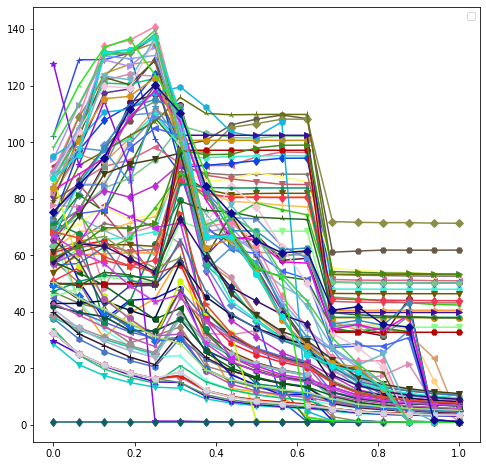

In [154]:
path = '.'
plot_ids_by_layers({key: val for key,val in model_ids.items()}, disable_label=True, only_mean=True)

KendalltauResult(correlation=0.011155071844949217, pvalue=0.8698603622868942)


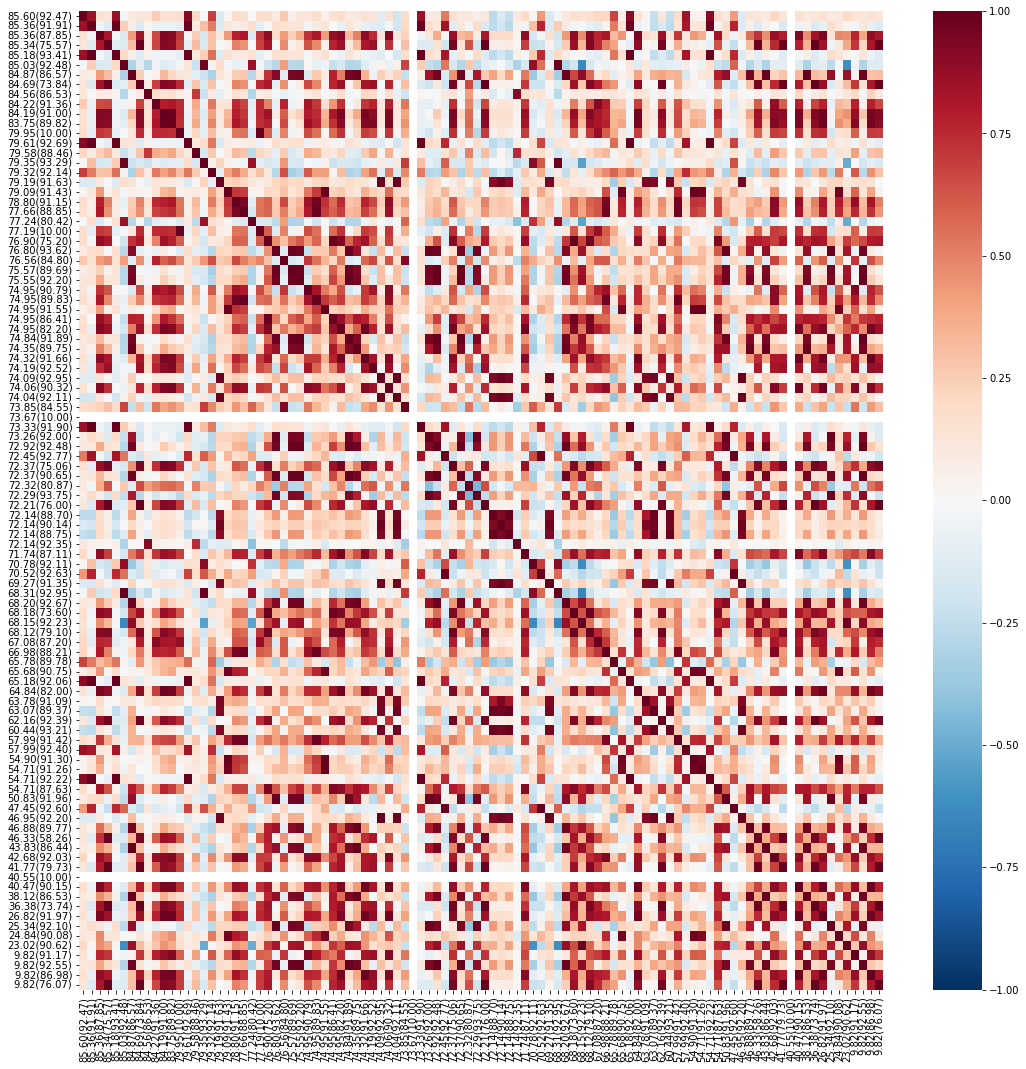

In [110]:

accs, real_accs, indices, similarity = plot_similarity(model_ids, 'proxy', figname=f'{path}/proxy_similarity.pdf', sim='corr', vmin=-1)

In [237]:

x = similarity
x = np.nan_to_num(x)

# print(x)
print(x.min(), x.mean(), np.median(x), x.max(), x.std(), x.shape,)
len(x[x>0.])
for l, r in [[0,6],[6,7],[7,8],[8,9],[9,10]]:
    l /= 10
    r /= 10
    num = sum(x[x>l]<r)
    ratio = num / len(x) * 100
    print(f"{l}<similarity<{r}: {num} ({ratio:2f})%")
num = sum(x>x.mean())
ratio = num / len(x) * 100
print(f"similarity>mean({x.mean()}): {num} ({ratio:2f})%")
num = sum(x>np.median(x))
ratio = num / len(x) * 100
print(f"similarity>median({np.median(x)}): {num} ({ratio:2f})%")

-0.48693509557447684 0.7331689242233991 0.8500359348056681 1.0 0.28792688584241877 (300, 300)
0.0<similarity<0.6: 15644 (5214.666667)%
0.6<similarity<0.7: 5988 (1996.000000)%
0.7<similarity<0.8: 10180 (3393.333333)%
0.8<similarity<0.9: 21538 (7179.333333)%
0.9<similarity<1.0: 31964 (10654.666667)%


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [235]:
from sklearn.cluster import SpectralClustering
x = similarity
x = np.nan_to_num(x) + 1
# x = IDs
# print(x.shape, np.isinf(x).any(), np.isnan(x).any(), x.mean())
best_cluster = None
best_n_clusters = 0
best_sim = 0
best_labels = None
for n_clusters in range(1, 8):
    # cluster = SpectralClustering(n_clusters=n_clusters, assign_labels='discretize', random_state=0)
    cluster = SpectralClustering(n_clusters=n_clusters, assign_labels='discretize', affinity='precomputed', random_state=0)
    cluster.fit_predict(x)
    labels = cluster.labels_
    u_labels = np.unique(labels)
    sim_avg = 0
    for label in u_labels:
        mask = labels == label
        sim = np.nan_to_num(similarity)[mask][:, mask]
        # print(f"label={label}: {sum(labels==label)} {sim.mean()}")
        sim_avg += sim.mean()
    sim_avg /= len(u_labels)
    if sim_avg > best_sim:
        best_sim = sim_avg
        best_cluster = cluster
        best_n_cluster = n_clusters
        best_labels = labels
    print(f"n_clusters={n_clusters} avg similarity={sim_avg}")
print(f"Best settings: {best_cluster} with sim {best_sim}")
u_labels = np.unique(best_labels)
for label in u_labels:
    mask = labels == label
    sim = np.nan_to_num(similarity)[mask][:, mask]
    print(f"label={label}: {sum(labels==label)} {sim.mean()}")
    sim_avg += sim.mean()

n_clusters=1 avg similarity=0.7331689242233991
n_clusters=2 avg similarity=0.7798429501979545
n_clusters=3 avg similarity=0.8486078494794803
n_clusters=4 avg similarity=0.6920247884336084
n_clusters=5 avg similarity=0.7460722803109263
n_clusters=6 avg similarity=0.7816180519707975
n_clusters=7 avg similarity=0.8015369058808773
Best settings: SpectralClustering(affinity='precomputed', assign_labels='discretize',
                   n_clusters=3, random_state=0) with sim 0.8486078494794803
label=0: 74 0.9378540795981022
label=1: 18 0.8704054171591921
label=2: 39 0.9119473390989121


(300, 2)


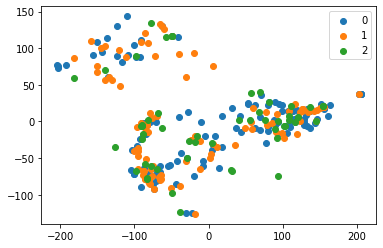

In [236]:
pca = PCA(2)
keys = list(model_ids.keys())
sub_keys = list(model_ids[keys[0]].keys())
# print([model_ids[keys[0]][k] for k in sub_keys])
IDs = [model_ids[k]['mean_IDs'] for k in keys]
IDs = np.array(IDs)
x = IDs
x[np.isnan(x)] = 0
df = pca.fit_transform(IDs)
print(df.shape)
import matplotlib.pyplot as plt
 
#Getting unique labels
label = best_labels
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [180]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
num = 100
for i in range(num):
    for j in range(i, num):
        node1 = f"{i}"
        node2 = f"{j}"
        G.add_edge(node1, node2, weight=float(f"{1-similarity[i,j]:.2f}"))

cut_value, partition = nx.stoer_wagner(G)
print(cut_value, partition)

# pos = nx.spring_layout(G)
# nx.draw(G, pos, node_size = 500, with_labels = True)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# plt.show()


16.58 (['72'], ['0', '9', '3', '57', '7', '63', '39', '32', '53', '92', '43', '5', '38', '78', '87', '89', '50', '58', '13', '19', '8', '88', '82', '81', '31', '83', '29', '79', '80', '1', '93', '10', '14', '4', '60', '70', '11', '56', '51', '54', '37', '91', '65', '45', '76', '33', '77', '86', '62', '25', '42', '85', '49', '12', '21', '26', '55', '40', '28', '73', '95', '24', '36', '75', '23', '6', '2', '69', '97', '35', '94', '16', '68', '90', '18', '27', '34', '46', '48', '59', '84', '47', '17', '99', '15', '52', '74', '20', '66', '96', '22', '98', '61', '67', '64', '30', '41', '71', '44'])


In [183]:
g = G
partition_1, partition_2 = nx.algorithms.community.kernighan_lin_bisection(g)
subgraph_1, subgraph_2 = g.subgraph(partition_1), g.subgraph(partition_2)
len(partition_1)

50

In [184]:
print(partition_1)

{'9', '86', '62', '25', '85', '12', '21', '26', '28', '73', '24', '43', '75', '78', '6', '38', '87', '89', '50', '94', '58', '88', '82', '72', '33', '27', '34', '29', '80', '1', '93', '4', '59', '17', '99', '15', '51', '52', '74', '20', '37', '66', '96', '98', '22', '61', '67', '30', '45', '44'}


KendalltauResult(correlation=-0.018303517652906512, pvalue=0.6371378346887988)


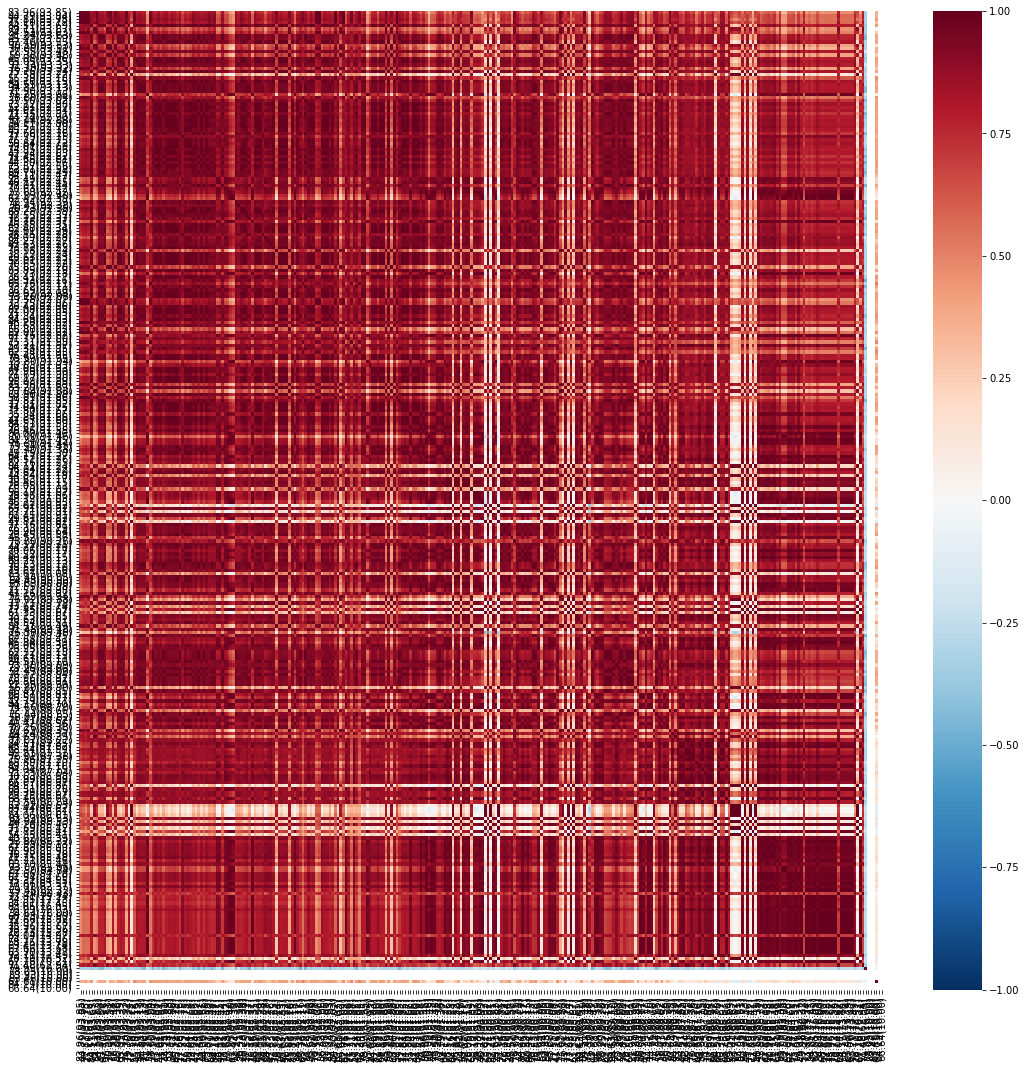

In [228]:

accs, real_accs, indices, similarity = plot_similarity(model_ids, 'real', figname=f'{path}/real_similarity.pdf', sim='corr', vmin=-1)

In [157]:
x = similarity[similarity==similarity]
print(np.isnan(similarity).any())
print(x.min(), x.mean(), np.median(x), x.max(), x.std(), x.shape, similarity.shape)

False
-0.45782148964291836 0.7116661089815015 0.8326362392780666 1.0 0.2940032130586128 (10000,) (100, 100)


In [141]:
x = similarity[0,:]
x = np.nan_to_num(x)
# print(x)
print(x.min(), x.mean(), np.median(x), x.max(), x.std(), x.shape,)
len(x[x>0.])

-0.4558325177185809 0.1970474026686312 0.1885835340065746 1.0 0.39056679780853626 (100,)


65

In [129]:
x = similarity[0,:]
x = np.nan_to_num(x)
# print(x)
print(x.min(), x.mean(), np.median(x), x.max(), x.std(), x.shape,)
len(x[x>0.])
for l, r in [[0,6],[6,7],[7,8],[8,9],[9,10]]:
    l /= 10
    r /= 10
    num = sum(x[x>l]<r)
    ratio = num / len(x) * 100
    print(f"{l}<similarity<{r}: {num} ({ratio:2f})%")
num = sum(x>x.mean())
ratio = num / len(x) * 100
print(f"similarity>mean({x.mean()}): {num} ({ratio:2f})%")
num = sum(x>np.median(x))
ratio = num / len(x) * 100
print(f"similarity>median({np.median(x)}): {num} ({ratio:2f})%")

0.0<similarity<0.6: 5118 (53.290296)%
0.6<similarity<0.7: 358 (3.727613)%
0.7<similarity<0.8: 470 (4.893794)%
0.8<similarity<0.9: 540 (5.622657)%
0.9<similarity<1.0: 705 (7.340691)%
similarity>mean(0.2753212468122411): 3892 (40.524781)%
similarity>median(0.19013831045627758): 4802 (50.000000)%


In [118]:
keys = list(model_ids.keys())
sub_keys = list(model_ids[keys[0]].keys())
print([model_ids[keys[0]][k] for k in sub_keys])
IDs = [model_ids[k]['mean_IDs'] for k in keys]
IDs = np.array(IDs)
IDs.shape

["0_{'0_1': 'avg_pool_3x3', '0_2': 'skip_connect', '1_2': 'avg_pool_3x3', '0_3': 'skip_connect', '1_3': 'conv_1x1', '2_3': 'skip_connect'}_acc76.90realAcc75.20", array([[-1.518611  , -1.41276175, -1.31941192, -0.79249936,  1.50446321,
        -2.20418722, -1.46137762, -1.07351043, -0.81909435, -0.60242925,
        -2.66379148, -0.56584473, -0.3795656 , -0.23526415, -0.15524493,
        -0.11940947,  0.10584925,  0.09334983,  0.52691256,  2.29696258,
        -3.70865043,  0.7428096 ,  0.38786719,  0.25441608,  0.21666511,
        -2.06136224,  2.09794675,  0.18627913,  0.14430145,  0.08001922,
         0.03583546],
       [-1.21613917, -1.32048894, -1.33137554, -0.82660381,  2.58652103,
        -2.19996065, -1.55084908, -1.20602462, -0.93075899, -0.71633468,
        -3.64476049, -1.10705343, -0.77759994, -0.53190851, -0.41359413,
        -0.31660095, -0.10434977, -0.0108866 ,  0.50477173,  3.41312485,
        -4.78648168,  0.64911156,  0.34482447,  0.27526563,  0.21442431,
        -2.92

(100, 31)

In [ ]:
groups = []
num_compare = 5
threshold = 0.9
for i in range(len(IDs)):
    if i == 0:
        groups.append(IDs[i])
    else:
        crt_ID = IDs[i]
        num_groups = len(groups)
        best_sim = 0.
        best_group_idx = 0
        for j in range(num_groups):
            sub_group = groups[j]
            if len(sub_group) <= num_compare:
                indices = list(range(len(sub_graph)))
            else:
                indices = np.random.choice(sub_group, num_compare, replace=False)
            sim = np.mean([np.corrcoef(crt_ID, sub_group[idx]) for idx in indices])
            if sim > best_sim:
                best_sim = sim
                best_group_idx = j
        groups[best_group_idx].append(crt_ID)

In [97]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import directed_hausdorff
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [119]:


# X = (IDs - IDs.min()) / (IDs.max() - IDs.min() + 1e-20)
X = IDs
d = np.corrcoef(X)
d[np.isnan(d)] = 0.
np.isnan(d).any()

False

In [120]:

cluster = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage = 'average')
cluster.fit(d)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

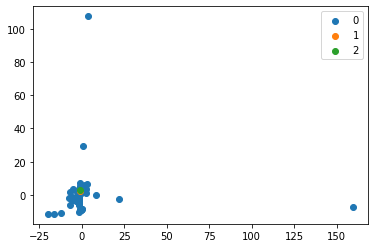

In [121]:
pca = PCA(2)
x = IDs
x[np.isnan(x)] = 0
df = pca.fit_transform(IDs)
import matplotlib.pyplot as plt
 
#Getting unique labels
label = cluster.labels_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [90]:
IDs[~np.isnan(IDs).any(axis=1)].shape

(98, 17)

In [86]:
import matplotlib.pyplot as plt
import numpy
import scipy.cluster.hierarchy as hcluster

# generate 3 clusters of each around 100 points and one orphan point
# N=100
# data = numpy.random.randn(3*N,2)
# data[:N] += 60
# data[-N:] += 10
# data[-10:] -= 20
data = IDs[~np.isnan(IDs).any(axis=1)]
print(data.shape)


# clustering
thresh = 0.98
clusters = hcluster.fclusterdata(data, thresh, criterion="distance", metric='correlation')
print(np.array(clusters).shape, len(set(clusters)))
print(np.array(clusters))

(98, 17)
(98,) 2
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [58]:

# plotting
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
print(title)
# plt.scatter(*numpy.transpose(data))
plt.scatter(*numpy.transpose(data), c=clusters)
plt.axis("equal")
plt.title(title)
plt.show()

threshold: 0.800000, number of clusters: 86


TypeError: scatter() takes from 2 to 11 positional arguments but 17 were given

In [13]:
sort_flag = 'real'
keys = list(model_ids.keys())
mean_ids = []
accs = []
real_accs = []
for key in keys:
    mi = np.array(model_ids[key]['mean_IDs'])
    mean_ids.append(mi)
    real_accs.append(float(model_ids[key]['label'].split('realAcc')[-1]))
    accs.append(model_ids[key]['acc'])
accs = np.array(accs)
real_accs = np.array(real_accs)
if sort_flag == 'proxy':
    indices = np.argsort(accs)[::-1]
else:
    indices = np.argsort(real_accs)[::-1]
print(np.array(accs)[indices])
mean_ids = np.vstack(mean_ids)[indices]
similarity = np.corrcoef(mean_ids)

NameError: name 'model_ids' is not defined

In [188]:
similarity

array([[ 1.        ,  0.91270451,  0.42413848, ..., -0.01912483,
                nan,  0.55838784],
       [ 0.91270451,  1.        ,  0.3752813 , ...,  0.03425813,
                nan,  0.57317209],
       [ 0.42413848,  0.3752813 ,  1.        , ...,  0.38303559,
                nan,  0.17652055],
       ...,
       [-0.01912483,  0.03425813,  0.38303559, ...,  1.        ,
                nan,  0.05349313],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.55838784,  0.57317209,  0.17652055, ...,  0.05349313,
                nan,  1.        ]])

In [187]:
model_ids[keys[0]]

{'label': "0_{'0_1': 'conv_1x1', '0_2': 'conv_3x3', '1_2': 'conv_3x3', '0_3': 'skip_connect', '1_3': 'none', '2_3': 'skip_connect'}_acc77.92realAcc93.00",
 'IDs': array([[ 2.94029361e+00,  2.04083948e+00,  1.78171895e+00,
          5.81207300e-01, -5.16284798e+00, -2.46825503e-01,
         -1.57377389e-01, -1.93135508e-01,  4.50457965e-02,
          4.21048736e-02, -6.96076838e+00,  1.16241531e-02,
          2.85178613e-04, -1.09163887e-02,  1.72788171e-03,
          1.04816195e-03, -8.99454134e-01, -2.59120529e-01,
         -1.20051165e+00, -5.74405528e+00,  4.91602248e+00,
          8.94481138e-02, -3.57581189e-02,  2.38181305e-01,
         -2.94092295e-03, -7.00287326e+00,  6.97239254e+00,
         -1.13389744e-02, -1.12015673e-02,  1.26442704e-02,
         -6.79719757e-04],
        [ 3.22396045e+00,  1.26086808e+00,  6.72977700e-01,
          4.23843954e-01, -9.03839528e-01, -2.10481706e-01,
         -1.32758696e-01, -1.21168722e-02, -2.55010773e-02,
         -1.80767920e-02, -7.00

## NBMB

In [12]:
ckpts = [
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/random_0net_1batch/2022-04-28_01-39-13/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch_NoneGrad/2022-05-04_06-55-10/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch_NoneGrad/2022-05-04_07-21-40/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_6net_1batch_NoneGrad/2022-05-04_07-11-04/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_6net_1batch_NoneGrad/2022-05-04_10-05-14/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_3net_1batch_NoneGrad/2022-05-04_07-11-04/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_3net_1batch_NoneGrad/2022-05-04_07-21-41/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_12net_1batch_NoneGrad/2022-05-04_07-11-05/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_12net_1batch_NoneGrad/2022-05-04_10-05-14/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch/2022-05-04_07-21-40/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch/2022-05-12_01-22-19/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch/2022-05-12_01-22-21/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_3net_1batch/2022-05-04_07-21-42/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_3net_1batch/2022-05-12_01-00-16/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_6net_1batch/2022-05-04_10-05-14/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_6net_1batch/2022-05-12_01-22-19/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_6net_1batch/2022-05-12_02-38-38/checkpoints/last.ckpt',
    '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_12net_1batch/2022-05-04_10-05-16/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_12net_1batch/2022-05-12_01-22-19/checkpoints/last.ckpt',
    # '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_12net_1batch/2022-05-12_02-38-38/checkpoints/last.ckpt'
]
ckpts = sorted(ckpts, key=lambda x: int(x.split('runs/')[1].split('/')[0].split('net_1')[0].split('_')[-1]), reverse=True)
print(ckpts)

supernet = NASBenchMBNet()
rm = RandomMutator(supernet)
rm.reset()
mask = rm._cache
print(supernet.arch)

['/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_12net_1batch/2022-05-04_10-05-16/checkpoints/last.ckpt', '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_6net_1batch/2022-05-04_10-05-14/checkpoints/last.ckpt', '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_3net_1batch/2022-05-04_07-21-42/checkpoints/last.ckpt', '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch/2022-05-04_07-21-40/checkpoints/last.ckpt', '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/random_0net_1batch/2022-04-28_01-39-13/checkpoints/last.ckpt']
12110111


In [66]:
# check_ckpts = ckpts[:1]
# check_ea = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nbmbnet_gpunum1_12net_1batch/2022-05-09_07-13-06/evolution_logs/checkpoint.pth.tar'

# check_ckpts = ckpts[1:2]
# check_ea = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nbmbnet_gpunum1_6net_1batch/2022-05-09_07-13-05/evolution_logs/checkpoint.pth.tar'

# check_ckpts = ckpts[2:3]
# check_ea = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nbmbnet_gpunum1_3net_1batch/2022-05-09_07-13-02/evolution_logs/checkpoint.pth.tar'

check_ckpts = ckpts[3:4]
check_ea = '/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nbmbnet_gpunum1_1net_1batch/2022-05-09_07-13-00/evolution_logs/checkpoint.pth.tar'
print(check_ea, check_ckpts)



/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/ea_search_search_nbmbnet_gpunum1_1net_1batch/2022-05-09_07-13-00/evolution_logs/checkpoint.pth.tar ['/home/xihe/xinhe/hyperbox_app/hyperbox_app/distributed/logs/runs/search_nbmbnet_gpunum1_1net_1batch/2022-05-04_07-21-40/checkpoints/last.ckpt']


0_21200122_acc84.06
1_02120222_acc83.96
2_22001221_acc85.42
3_22201000_acc73.44
4_20012110_acc80.91
5_02210220_acc83.49
6_20012002_acc78.39
7_10221122_acc84.74
8_11200200_acc77.29
9_20110112_acc83.05
10_21110100_acc75.23
11_21122022_acc84.43
12_20021000_acc70.39
13_02120212_acc83.52
14_22000220_acc80.91
15_10200021_acc77.14
16_01002122_acc77.97
17_11112011_acc83.78
18_12111012_acc83.57
19_22221020_acc84.48
20_02220120_acc83.80
21_21021120_acc84.69
22_01102202_acc81.69
23_10212222_acc85.47
24_11101120_acc82.50
25_21200220_acc84.90
26_11212101_acc83.88
27_22111212_acc85.10
28_21102110_acc82.40
29_01121001_acc79.43
30_21122220_acc85.31
31_21101001_acc79.27
32_20021201_acc82.86
33_22001001_acc76.72
34_11220211_acc85.47
35_02222211_acc83.88
36_11120020_acc81.17
37_11111210_acc83.65
38_00101010_acc66.22
39_22110221_acc85.70
40_01110112_acc81.30
41_10120121_acc83.31
42_21111012_acc83.75
43_22101022_acc83.46
44_01212201_acc82.50
45_00200122_acc76.54
46_11101012_acc82.06
47_01120122_acc81.67
48

No handles with labels found to put in legend.


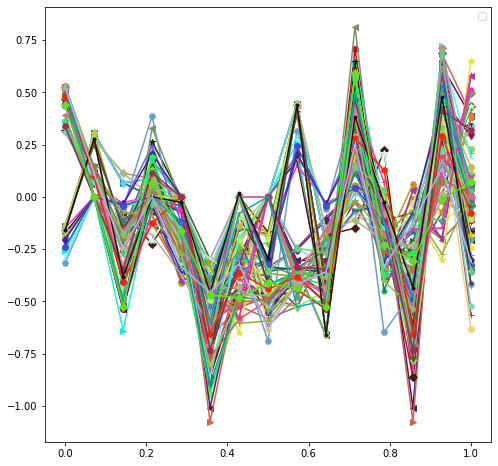

In [72]:
# nb201
# net_class = NASBench201Network

net_class = NASBenchMBNet
model_ids = {}
evolution_logs = torch.load(check_ea)
arch_keys = list(evolution_logs['vis_dict'].keys())
flag = 'vis'
infos = evolution_logs['vis_dict']
# infos = evolution_logs['keep_top_k'][25]
np.random.shuffle(arch_keys)
num = min(100, len(infos))
for model_idx in range(num):
    if flag == 'vis':
        mask = infos[arch_keys[model_idx]]['arch']
        acc = infos[arch_keys[model_idx]]['proxy_perf'] * 100
    else:
        mask = infos[model_idx]['arch']
        acc = infos[model_idx]['proxy_perf']*100
    rm.sample_by_mask(mask)
    real_acc = supernet.query_by_key(query_file_path='/home/xihe/xinhe/hyperbox/hyperbox/networks/nasbench_mbnet/nasbench_mbnet_cifar10.json')
    key = f"{model_idx}_{supernet.arch}_acc{acc:.2f}"
    print(key)
    model_ids[key] = {'label': '', 'IDs': []}
    for i, ckpt in enumerate(check_ckpts):
        if 'random' in ckpt:
            net = net_class(mask=mask)
        else:
            supernet.load_from_ckpt(ckpt)
            net = supernet.build_subnet(mask)
        net.eval()
        IDs = []
        for batch_idx, batch in enumerate(test_loader):
            id_batch = []
            if batch_idx == 5:
                break
            imgs, labels = batch
            with torch.no_grad():
                y = net(imgs)
            features = net.features
            for idx, feat in enumerate(features):
                if isinstance(feat, torch.Tensor):
                    feat = feat.view(bs, -1).detach().cpu().numpy()
                else:
                    feat = feat.reshape(bs, -1)
                try:
                    # _id = twonn2(feat)
                    # _id = skdim.id.TwoNN().fit_transform(X=feat)
                    # _id = skdim.id.FisherS().fit_transform(X=feat)
                    _id = skdim.id.ESS().fit_transform(X=feat)
                    # _id = skdim.id.MLE().fit_transform(X=feat)
                except Exception as e:
                    print(idx, str(e))
                    print(feat.max(), feat.mean(), feat.min())
                id_batch.append(_id)
            # id_batch = np.array(id_batch)[1:]-np.array(id_batch)[:-1]
            id_batch_1 = np.array(id_batch)[1:]-np.array(id_batch)[:-1]
            id_batch_2 = np.array(id_batch_1)[1:]-np.array(id_batch_1)[:-1]
            id_batch = id_batch_1.tolist() + id_batch_2.tolist()
            # id_batch = id_batch + id_batch_1.tolist() + id_batch_2.tolist()
            # id_batch = np.array(id_batch.tolist().extend(id_batch_1))
            # id_batch = np.array(id_batch.tolist().extend(id_batch_2))
            # id_batch = np.array(id_batch)
            IDs.append(id_batch)
        IDs = np.vstack(IDs)
        IDs = IDs/np.amax(IDs)
        # IDs = IDs.mean(0)
        model_ids[key]['IDs'] = IDs
        # label = key + ckpt.split('runs/')[1].split('/')[0] + f'acc{acc:.2f}' if ckpt != 'random' else 'random'
        # label = f'_acc{acc:.2f}' if ckpt != 'random' else 'random'
        label = key
        model_ids[key]['label'] = label + f"realAcc{real_acc:.2f}"
        model_ids[key]['acc'] = acc
        model_ids[key]['mean_IDs'] = IDs.mean(0)
# name = None
# plot_ids_by_layers({key: val for key,val in model_ids.items() if name is not None and name in val['label']}, disable_label=False)
plot_ids_by_layers({key: val for key,val in model_ids.items()}, disable_label=True, only_mean=True)

[86.69270873 85.96354127 85.72916389 85.70312262 85.57291627 85.46875119
 85.46875119 85.41666865 85.33853889 85.33853889 85.31249762 85.10416746
 85.02604365 84.89583135 84.73958373 84.68750119 84.66145992 84.47916508
 84.45312381 84.42708254 84.375      84.34895873 84.06249881 83.95833373
 83.88020992 83.88020992 83.80208611 83.77603889 83.74999762 83.72395635
 83.72395635 83.69791508 83.64583254 83.56770873 83.54166746 83.51562619
 83.51562619 83.48958492 83.46354365 83.41146111 83.30729008 83.09895992
 83.04687738 83.04687738 82.89062381 82.86458254 82.49999881 82.49999881
 82.44791627 82.39583373 82.13541508 82.10937381 82.05729127 81.92708492
 81.90104365 81.77083135 81.69270754 81.66666627 81.30208254 81.30208254
 81.25       81.19791746 81.17187619 80.93749881 80.91145754 80.91145754
 80.88541627 80.70312738 79.47916389 79.45312262 79.42708135 79.34895754
 79.27083373 79.21875119 78.48958373 78.38541865 77.96875238 77.81249881
 77.47395635 77.29166746 77.13541389 77.13541389 76

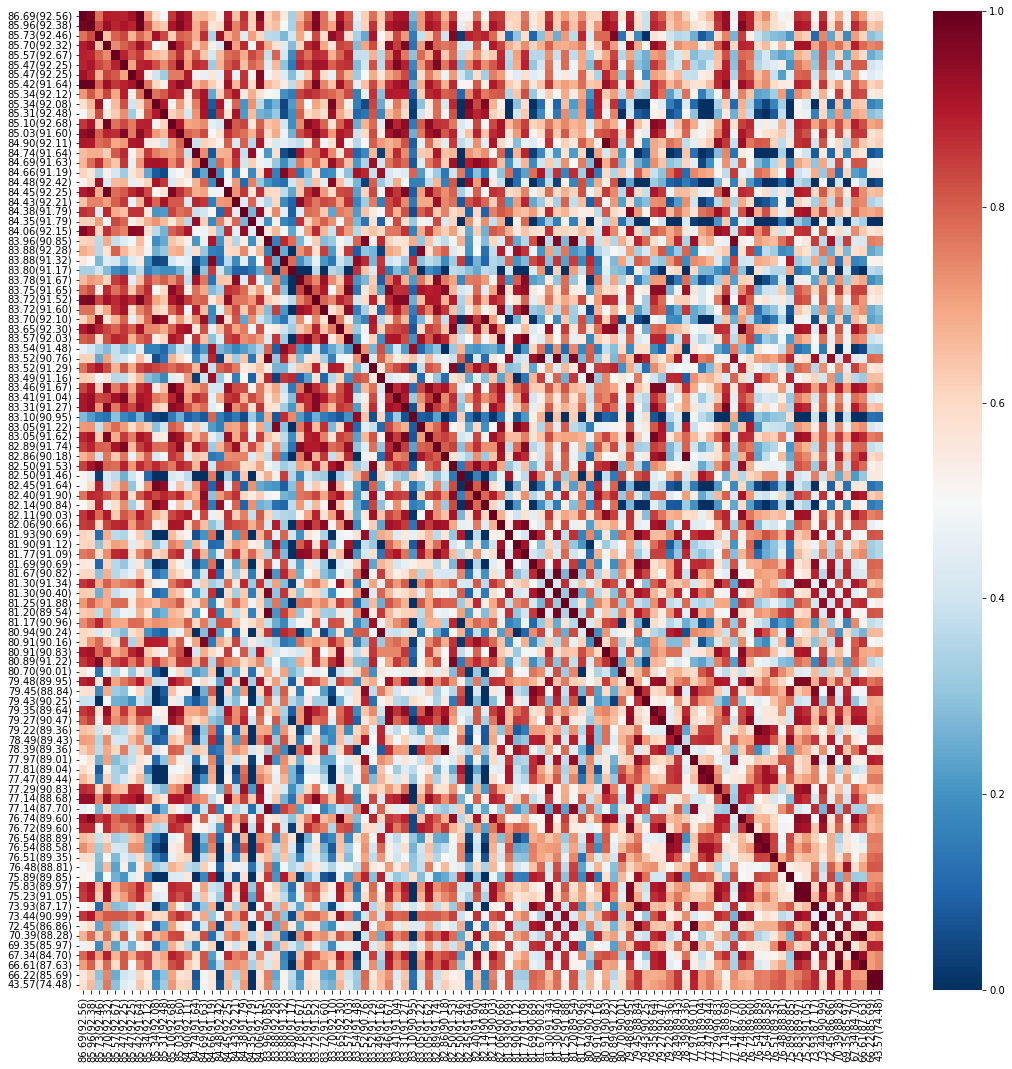

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity, paired_distances

keys = list(model_ids.keys())
mean_ids = []
accs = []
real_accs = []
for key in keys:
    mi = np.array(model_ids[key]['mean_IDs'])
    # mi = (mi - mi.min())/(mi.max() - mi.min())
    # print(mi)
    mean_ids.append(mi)
    real_accs.append(float(model_ids[key]['label'].split('realAcc')[-1]))
    accs.append(model_ids[key]['acc'])
accs = np.array(accs)
real_accs = np.array(real_accs)
indices = np.argsort(accs)[::-1]
print(np.array(accs)[indices])
mean_ids = np.vstack(mean_ids)[indices]
print(mean_ids.shape)
# mean_ids = (mean_ids - mean_ids.min()) / (mean_ids.max() - mean_ids.min())
# similarity = np.dot(mean_ids, mean_ids.T)
# similarity = (similarity - similarity.min()) / (similarity.max() - similarity.min())
# similarity = similarity/np.amax(similarity)
# similarity = cosine_similarity(mean_ids, mean_ids)
similarity = np.corrcoef(mean_ids)
# similarity = np.cov(mean_ids)
# similarity = (similarity - similarity.min()) / (similarity.max() - similarity.min())

# similarity = 1 - spatial.distance.cosine(mean_ids, mean_ids.T)
print(similarity.shape)

tick_keys = [f"{acc:.2f}({racc:.2f})" for acc, racc in zip(accs[indices], real_accs[indices])]
# tick_keys = [f"{acc:.4f}" for acc in accs[indices]]
num = 40
fig = plt.figure(num=1, figsize=(18,18))
ax = sns.heatmap(similarity, xticklabels=tick_keys, yticklabels=tick_keys, cmap='RdBu_r', vmin=0, vmax=1)
# ax = sns.heatmap(similarity, cmap='RdBu_r', vmin=0, vmax=1)
# ax = sns.heatmap(similarity[:num], vmin=-1, vmax=1, mask=np.triu(similarity))
# ax.set_xticklabels(tick_keys[:num], rotation=90)
# ax.set_yticklabels(tick_keys[:num], rotation=0)
plt.show()

In [74]:
similarity.mean(), similarity.min(), similarity.max()

(0.5798639783262397, -0.28358957415714847, 1.0)

[85.10416746 85.57291627 86.69270873 85.31249762 85.72916389 84.47916508
 85.96354127 85.70312262 83.64583254 83.88020992 85.46875119 84.45312381
 85.46875119 84.42708254 84.06249881 85.33853889 84.89583135 83.69791508
 85.33853889 83.56770873 82.39583373 81.25       84.34895873 84.375
 82.89062381 83.46354365 83.77603889 83.74999762 85.41666865 82.44791627
 84.73958373 84.68750119 83.04687738 85.02604365 83.72395635 82.49999881
 83.72395635 83.54166746 82.49999881 81.30208254 83.88020992 83.51562619
 83.30729008 80.88541627 83.04687738 84.66145992 83.80208611 83.48958492
 81.90104365 81.77083135 75.23437738 83.41146111 73.4375     81.17187619
 83.09895992 83.95833373 82.13541508 80.91145754 77.29166746 81.66666627
 83.51562619 81.69270754 81.92708492 82.05729127 79.27083373 81.30208254
 79.42708135 80.93749881 82.86458254 80.91145754 82.10937381 80.70312738
 75.83333254 79.47916389 75.88541508 79.34895754 76.71874762 76.74478889
 81.19791746 77.47395635 78.48958373 78.38541865 79.2187

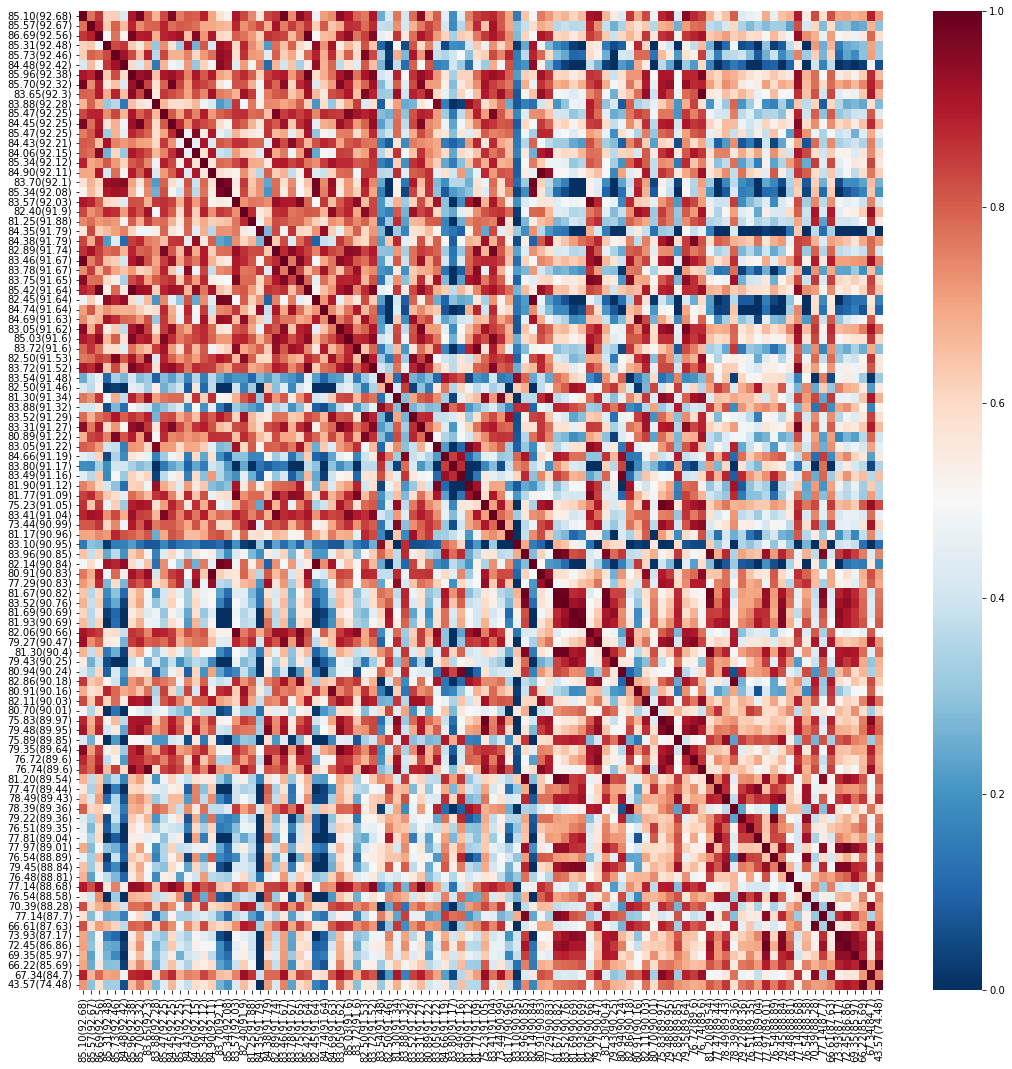

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity, paired_distances

keys = list(model_ids.keys())
mean_ids = []
accs = []
real_accs = []
for key in keys:
    mi = np.array(model_ids[key]['mean_IDs'])
    # mi = (mi - mi.min())/(mi.max() - mi.min())
    # print(mi)
    mean_ids.append(mi)
    real_accs.append(float(model_ids[key]['label'].split('realAcc')[-1]))
    accs.append(model_ids[key]['acc'])
accs = np.array(accs)
real_accs = np.array(real_accs)
indices = np.argsort(real_accs)[::-1]
# indices = np.argsort(accs)[::-1]
print(np.array(accs)[indices])
print(np.array(real_accs)[indices])
mean_ids = np.vstack(mean_ids)[indices]
print(mean_ids.shape)
# mean_ids = (mean_ids - mean_ids.min()) / (mean_ids.max() - mean_ids.min())
# similarity = np.dot(mean_ids, mean_ids.T)
# similarity = (similarity - similarity.min()) / (similarity.max() - similarity.min())
# similarity = similarity/np.amax(similarity)
# similarity = cosine_similarity(mean_ids, mean_ids)
similarity = np.corrcoef(mean_ids)
# similarity = np.cov(mean_ids)
# similarity = (similarity - similarity.min()) / (similarity.max() - similarity.min())

# similarity = 1 - spatial.distance.cosine(mean_ids, mean_ids.T)
print(similarity.shape)

tick_keys = [f"{acc:.2f}({racc})" for acc, racc in zip(accs[indices], real_accs[indices])]
# tick_keys = [f"{acc:.4f}" for acc in accs[indices]]
num = 40
fig = plt.figure(num=1, figsize=(18,18))
ax = sns.heatmap(similarity, xticklabels=tick_keys, yticklabels=tick_keys, cmap='RdBu_r', vmin=0, vmax=1)
# ax = sns.heatmap(similarity[:num], vmin=-1, vmax=1, mask=np.triu(similarity))
# ax.set_xticklabels(tick_keys[:num], rotation=90)
# ax.set_yticklabels(tick_keys[:num], rotation=0)
plt.show()

In [76]:
from scipy.stats import kendalltau
kendalltau(accs, real_accs)

KendalltauResult(correlation=0.7189873749508682, pvalue=3.9525247930716973e-26)

In [77]:
keys = [key.split('_')[1] for key in model_ids]
keys

['21200122',
 '02120222',
 '22001221',
 '22201000',
 '20012110',
 '02210220',
 '20012002',
 '10221122',
 '11200200',
 '20110112',
 '21110100',
 '21122022',
 '20021000',
 '02120212',
 '22000220',
 '10200021',
 '01002122',
 '11112011',
 '12111012',
 '22221020',
 '02220120',
 '21021120',
 '01102202',
 '10212222',
 '11101120',
 '21200220',
 '11212101',
 '22111212',
 '21102110',
 '01121001',
 '21122220',
 '21101001',
 '20021201',
 '22001001',
 '11220211',
 '02222211',
 '11120020',
 '11111210',
 '00101010',
 '22110221',
 '01110112',
 '10120121',
 '21111012',
 '22101022',
 '01212201',
 '00200122',
 '11101012',
 '01120122',
 '02200120',
 '01010002',
 '21201010',
 '11102111',
 '22001010',
 '11112020',
 '02002022',
 '22021002',
 '00212212',
 '20001112',
 '01222021',
 '12111221',
 '12212120',
 '12022002',
 '12021020',
 '01100122',
 '02201221',
 '20211012',
 '00002000',
 '02210100',
 '21010011',
 '20211120',
 '22022100',
 '02010222',
 '00202220',
 '01222222',
 '00201110',
 '02001201',
 '12002221',

In [364]:
model_ids['0_22102112_acc90.44'].keys()

dict_keys(['label', 'IDs', 'acc', 'mean_IDs'])

In [365]:
similarity

array([[1.        , 0.75967053, 0.93163247, ..., 0.38400681, 0.31217418,
        0.60748584],
       [0.75967053, 1.        , 0.750634  , ..., 0.85871847, 0.79067589,
        0.29743838],
       [0.93163247, 0.750634  , 1.        , ..., 0.37497615, 0.36124427,
        0.59352244],
       ...,
       [0.38400681, 0.85871847, 0.37497615, ..., 1.        , 0.96093493,
        0.10458091],
       [0.31217418, 0.79067589, 0.36124427, ..., 0.96093493, 1.        ,
        0.15318255],
       [0.60748584, 0.29743838, 0.59352244, ..., 0.10458091, 0.15318255,
        1.        ]])

In [371]:
print(similarity.min(), similarity.max(), similarity.mean())

-0.2732335039654099 1.0 0.5731921445418725


In [2]:
1+1

2